In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.rcParams["lines.linewidth"] = 1.5


In [2]:
data = pd.read_csv("../data/TD3BCHopperAgg.csv")
data.columns


Index(['Step', 'Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score',
       'Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score__MIN',
       'Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score__MAX',
       'Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score',
       'Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score__MIN',
       'Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score__MAX',
       'Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score',
       'Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score__MIN',
       'Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score__MAX',
       'Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score',
       'Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score__MIN',
       'Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score__MAX'],
      dtype='object')

In [3]:
data = data[data["Step"] < 500001]
data["Step"] = data["Step"] / 100000


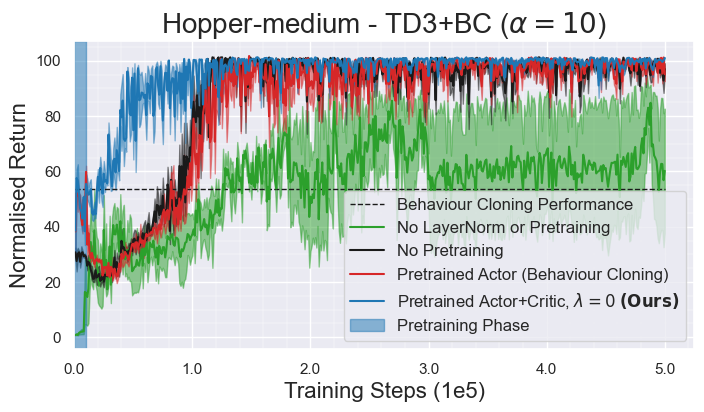

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(
    data["Step"],
    53.5 * np.ones_like(data["Step"]),
    label="Behaviour Cloning Performance",
    linestyle="--",
    color="k",
    linewidth=1.0,
)
ax.plot(
    data["Step"],
    data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score"],
    label="No LayerNorm or Pretraining",
    color="tab:green",
)
ax.fill_between(
    data["Step"],
    data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score"]
    - (
        data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score__MAX"]
        - data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score__MIN"]
    )
    / 4,
    data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score"]
    + (
        data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score__MAX"]
        - data["Name: Prod-TD3-BC-noLN-hopper-medium - d4rl_normalized_score__MIN"]
    )
    / 4,
    color="tab:green",
    alpha=0.5,
)
ax.plot(
    data["Step"],
    data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score"],
    label="No Pretraining",
    color="k",
)
ax.fill_between(
    data["Step"],
    data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score"]
    - (
        data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score__MAX"]
        - data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score__MIN"]
    )
    / 4,
    data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score"]
    + (
        data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score__MAX"]
        - data["Name: Prod-TD3-BC-hopper-medium - d4rl_normalized_score__MIN"]
    )
    / 4,
    color="k",
    alpha=0.5,
)
ax.plot(
    data["Step"],
    data["Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score"],
    label="Pretrained Actor (Behaviour Cloning)",
    color="tab:red",
)
ax.fill_between(
    data["Step"],
    data["Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score"]
    - (
        data[
            "Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score__MAX"
        ]
        - data[
            "Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score__MIN"
        ]
    )
    / 4,
    data["Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score"]
    + (
        data[
            "Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score__MAX"
        ]
        - data[
            "Name: Prod-TD3-BC-pretrainBC10k-hopper-medium - d4rl_normalized_score__MIN"
        ]
    )
    / 4,
    color="tab:red",
    alpha=0.5,
)
ax.plot(
    data["Step"],
    data["Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score"],
    label=r"Pretrained Actor+Critic, $\lambda=0$ $\bf(Ours)$",
    color="tab:blue",
)
ax.fill_between(
    data["Step"],
    data["Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score"]
    - (
        data[
            "Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score__MAX"
        ]
        - data[
            "Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score__MIN"
        ]
    )
    / 4,
    data["Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score"]
    + (
        data[
            "Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score__MAX"
        ]
        - data[
            "Name: Prod-TD3-BC-pretrainAC10k-hopper-medium - d4rl_normalized_score__MIN"
        ]
    )
    / 4,
    color="tab:blue",
    alpha=0.5,
)
ax.axvspan(0, 0.1, alpha=0.5, color="tab:blue", label="Pretraining Phase")
ax.set_xlim(0)
ax.legend(loc="lower right", fontsize=12)
ax.set_title(r"Hopper-medium - TD3+BC ($\alpha=10$)", fontsize=20)
ax.set_xlabel("Training Steps (1e5)", fontsize=16)
ax.set_ylabel("Normalised Return", fontsize=16)
ax.grid(visible=True, which="major")
ax.grid(visible=True, which="minor", linewidth=0.3)
ax.minorticks_on()
ax.xaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter("{x:.1f}"))
plt.show()
fig.savefig("../plots/TD3BCHopper.pdf", bbox_inches="tight")
